In [ ]:
"""
Time series with data -- PGE data undisclosed customer
Warren Watts
"""

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# read in clean data
df = pd.read_csv('pge_electric_interval_data.csv')


In [5]:
# look at df
print(df.shape, "\n")
print(df.head(), "\n")
df.describe()

(3172, 8) 

             TYPE        DATE START TIME END TIME  USAGE UNITS   COST  NOTES
0  Electric usage  2018-10-26      00:00    00:14   0.08   kWh  $0.02    NaN
1  Electric usage  2018-10-26      00:15    00:29   0.08   kWh  $0.02    NaN
2  Electric usage  2018-10-26      00:30    00:44   0.08   kWh  $0.02    NaN
3  Electric usage  2018-10-26      00:45    00:59   0.08   kWh  $0.02    NaN
4  Electric usage  2018-10-26      01:00    01:14   0.09   kWh  $0.02    NaN 



,USAGE,NOTES
count,3172.000000,0.0
mean,0.172396,NaN
std,0.132056,NaN
min,0.020000,NaN
25%,0.070000,NaN
50%,0.130000,NaN
75%,0.250000,NaN
max,0.810000,NaN


In [12]:
# time is in consistent 15 minute intervals so generate a list of values for time 
# starting at 0
X = [15*i for i in range(3172)]
print(X[0:200])
print(X[-1])

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440, 1455, 1470, 1485, 1500, 1515, 1530, 1545, 1560, 1575, 1590, 1605, 1620, 1635, 1650, 1665, 1680, 1695, 1710, 1725, 1740, 1755, 1770, 1785, 1800, 1815, 1830, 1845, 1860, 1875, 1890, 1905, 1920, 1935, 1950, 1965, 1980, 1995, 2010, 2025, 2040, 2055, 2070, 2085, 2100, 2115, 2130, 2145, 2160, 2175, 2190, 2205, 2220, 2235, 2250, 2265, 2280, 2295, 2310, 2325, 2340, 2355, 2370, 2385, 2400, 2415, 2430, 2445, 2460, 2475, 2490, 2505, 2520, 2535, 2550, 2565, 2580, 2595, 2610, 2625, 2640, 2655, 2670, 

In [9]:
# generate y values from usage column
y = list(df["USAGE"])
print(y[0:200])

type(y)

[0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.11, 0.11, 0.11, 0.11, 0.09, 0.09, 0.09, 0.09, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.09, 0.09, 0.09, 0.09, 0.31, 0.31, 0.31, 0.31, 0.18, 0.18, 0.18, 0.18, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04, 0.06, 0.06, 0.06, 0.06, 0.08, 0.08, 0.08, 0.08, 0.06, 0.06, 0.06, 0.06, 0.09, 0.09, 0.09, 0.09, 0.06, 0.06, 0.06, 0.06, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.04, 0.04, 0.04, 0.04, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.07, 0.07, 0.07, 0.07, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09, 0.09, 0.09, 0.09, 0.14, 0.14, 0.14, 0.14, 0.17, 0.17, 0.17, 0.17, 0.11, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.12, 0.12, 0.12, 0.12, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.13, 0.13, 0.13, 0.13, 0.15, 0.15, 0.15, 0.15, 0.1

list

In [28]:
# Polynomial fit using Numpy
# increased order to 15 to try to match data better
Order = 15
fit = np.polyfit(X,y,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t")
print(fit1)
y1 = fit1(X)

Coeff  [ 6.71554218e-64 -2.37836543e-58  3.79654386e-53 -3.60839359e-48
  2.27193337e-43 -9.97309048e-39  3.12709024e-34 -7.05443330e-30
  1.13749245e-25 -1.28419644e-21  9.76866837e-18 -4.69152264e-14
  1.27164666e-10 -1.57591639e-07  6.10612832e-05  9.48757964e-02]
           15             14             13             12
6.716e-64 t  - 2.378e-58 t  + 3.797e-53 t  - 3.608e-48 t 
              11             10             9             8
 + 2.272e-43 t  - 9.973e-39 t  + 3.127e-34 t - 7.054e-30 t
              7             6             5             4             3
 + 1.137e-25 t - 1.284e-21 t + 9.769e-18 t - 4.692e-14 t + 1.272e-10 t
              2
 - 1.576e-07 t + 6.106e-05 t + 0.09488


In [29]:
# Using polynomial equation, find the value of I for time interval of 15 min
y_calculated = []
for val in range(0,47566,15):
    y_calculated.append(fit1(val))  

In [30]:
# print to check
print(y_calculated[0:5])
print(len(y_calculated))
print(len(X))

[0.09487579639616511, 0.09575668433815075, 0.09656919809734694, 0.09731582836008885, 0.09799901056839463]
3172
3172


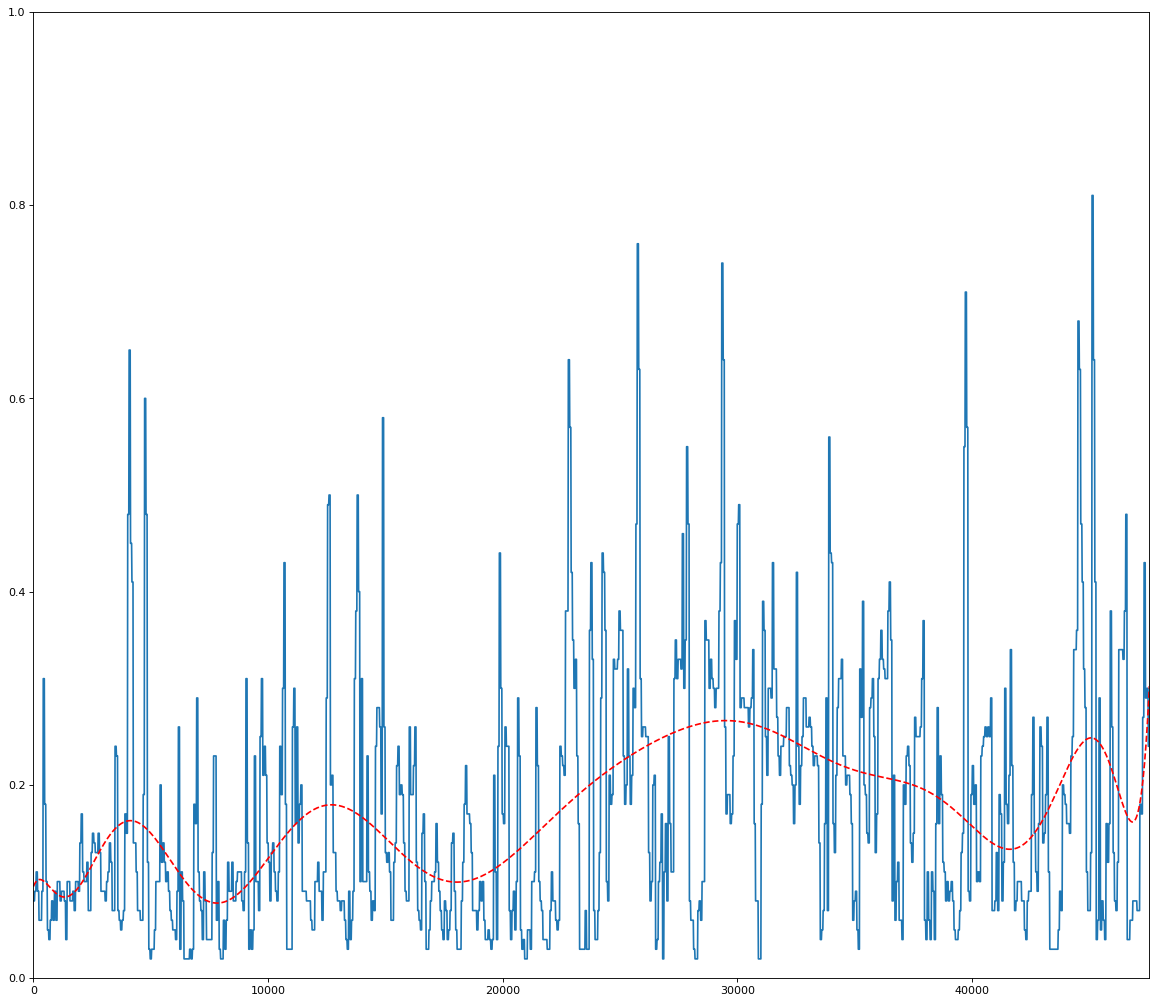

In [31]:
# create plot of predicted vs. actual
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,y,'-')
plt.plot(X,y_calculated,'--', color='r')
plt.axis([0,47565,0,1.0])
plt.show()

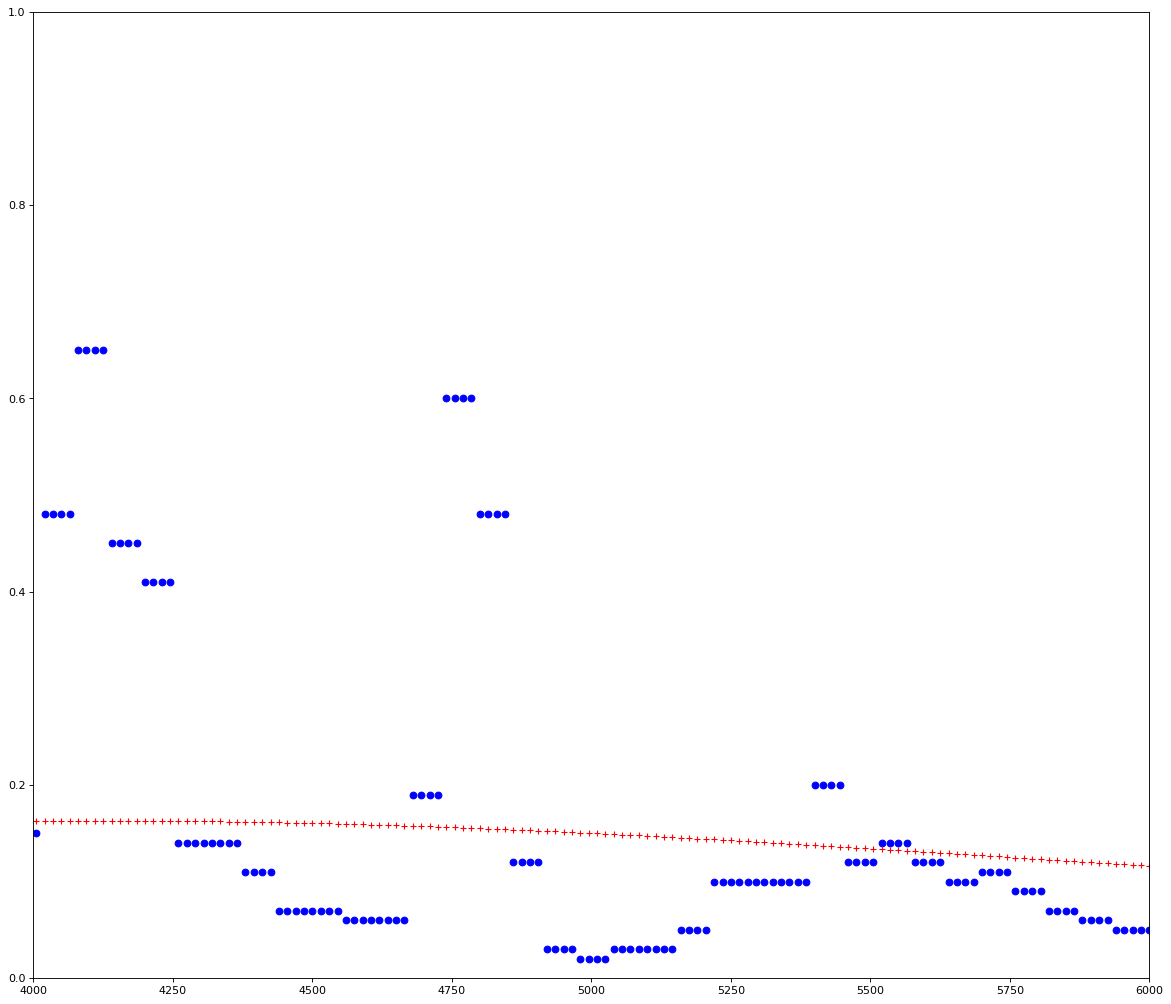

In [34]:
# Zoom in to see details
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(X,y,'bo')
plt.plot(X,y_calculated,'r+')
plt.axis([4000,6000,0.0,1.0])
plt.show()